In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.ndimage as ndi

np.set_printoptions(suppress=True)

(400, 500)


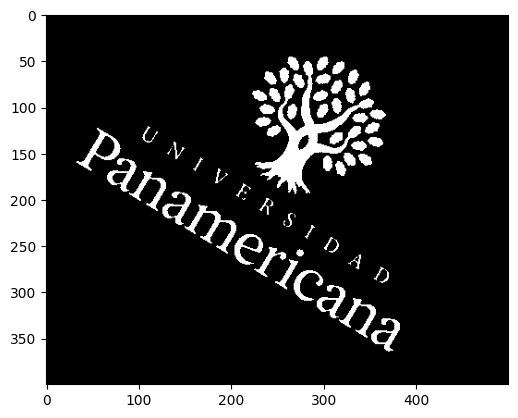

In [9]:
image = cv2.imread("panamericana1.PNG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
image = np.logical_not(image)
plt.imshow(image, cmap="gray")
print(image.shape)
h,w = image.shape

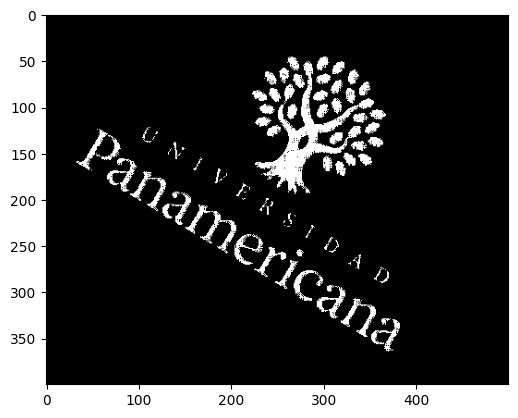

In [55]:
def transformImage(image, individual):
    def scale(img, s_x, s_y):
        s_x, s_y = 1/s_x, 1/s_y
        mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]]) #scale image matrix in x and y.
        return ndi.affine_transform(img, mat_scale)
    def move(img, t_x, t_y):
        mat_move = np.array([[1,0,t_y],[0,1,-t_x],[0,0,1]]) 
        return ndi.affine_transform(img, mat_move)
    def rotate(myimg, theta):
        d = 360
        theta = (theta % d)*2*np.pi/d
        h, w = myimg.shape
        mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
        return ndi.affine_transform(myimg, mat_rotate)
    result = image.copy()
    result = move(result, individual[0], individual[1])
    result = rotate(result, individual[2])
    result = scale(result, individual[3], individual[3])
    return result

#plt.imshow(transformImage(image, [-10,5,30,1.2,2,3,5,0.01]), cmap="gray")
plt.imshow(transformImage(image, [0,0,0,1,2,3,5,0.01]), cmap="gray")


In [ ]:
def fitness(original, child):
    return np.sum(original^child)
fitness(image,image)

NameError: name 'image' is not defined

In [ ]:
def initial_population(n, nvar, mbounds):
    nvar = int(nvar)
    population = np.zeros((n,nvar*2))
    for i in range(n):
        for j in range(nvar*2):
            if(mbounds[j][2] == "u"):
                population[i,j] = np.round(np.random.uniform(float(mbounds[j][0]), float(mbounds[j][1])), 2)
            else:
                population[i,j] = np.round(np.random.normal(loc=float(mbounds[j][0]), scale=float(mbounds[j][1])), 2)
    return population   

mbounds = np.array([(-w/2, w/2, "u"), #x
                    (-h/2, h/2, "u"), #y
                    (-180, 180, "u"), #theta
                    (0.5, 1.5, "u"), #alpha
                    (0, w/10, "n"),
                    (0, h/10, "n"),
                    (0, 30, "n"),
                    (0, 0.1, "n")])
initial_population(5,mbounds.shape[0]/2, mbounds) #n = population size

NameError: name 'w' is not defined

In [ ]:
def crossover():
    

SyntaxError: unexpected EOF while parsing (1456590036.py, line 2)